<a href="https://colab.research.google.com/github/Drovie/Machine_Learning/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC_k_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1
### Вариант 98

Тема: кластеризация (методом k-средних)

Дано: Массив точек на плоскости.

Требуется:
1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень
кластеризации.
2. Выполнить кластеризацию данного множества точек методом k-средних по найденному
кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).
3. Напечатать:
- количество точек в каждом кластере
- координаты центроидов кластеров.
4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений
параметра random_state
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Указания к выполнению: визуализировать график метода Elbow, визуализировать результаты
кластеризации вместе с центроидами. Среда выполнения: любые среды с Python или Rstudio.
Фрагменты программного кода в отчете приводить не требуется (сохраните их у себя).


##Пункт 1: Импорт бибиотек и подготовка данных


In [ ]:
import numpy as np                  # уже классическая "математическая" библиотека numpy, для вычислений
import matplotlib.pyplot as plt     # ещё одна уже классическая библиотека для визуализации данных
from sklearn.cluster import KMeans  # библиотека, предоставляющая инструменты машинного обучения, в том числе методы кластеризации данных

In [ ]:
# массив данных из варианта 98 к заданию
data = np.array ([[ 1.80014345, 5.70549919],
 [ 7.24306384, 2.12558511],
 [ 2.99072997, 5.58637519],
 [ 1.85746408, 6.69352836],
 [ 3.69253183, 5.86792628],
 [12.26572894,13.07652436],
 [ 7.72282509, 2.16726822],
 [ 0.4324003 , 5.23379238],
 [ 7.22031738, 1.51298785],
 [21.41102114,16.40432684],
 [21.34920153,17.00701161],
 [ 2.49069927, 6.02480783],
 [21.92315005,17.12668058],
 [ 2.49945196, 6.45421869],
 [ 1.42461758, 6.55315626],
 [13.19425365,12.89576564],
 [20.30226456,16.95402232],
 [13.7114664 ,13.22266565],
 [20.75876857,16.49472324],
 [12.38118421,13.73599487],
 [21.93436882,19.03647462],
 [13.38670295,13.20347623],
 [21.34071027,15.90957548],
 [ 8.17087549, 1.2566372 ],
 [ 1.55002592, 5.69690691],
 [18.48702831,18.52664403],
 [ 3.66034436, 6.45741819],
 [11.83572648,12.31547278],
 [ 7.78897209, 2.24613047],
 [12.05189263, 9.51053515],
 [ 7.93030645, 2.34666681],
 [22.27153461,15.44141778],
 [ 7.44175107, 1.5818377 ],
 [ 3.2756531 , 6.08588705],
 [12.56437983,10.74563056],
 [ 7.74467672, 1.36068019],
 [ 3.14760464, 6.08468864],
 [ 7.36772639, 2.33238407],
 [ 8.46393912, 1.79160009],
 [ 7.47224334, 1.68685825],
 [11.99119998,10.85331728],
 [ 8.27116109, 1.50325185],
 [ 2.69787054, 4.58958978],
 [20.93269773,19.87295723],
 [ 3.94073571, 6.0781886 ],
 [19.38441385,15.49677043],
 [ 2.5837518 , 6.52244359],
 [13.05009476,13.49632661],
 [12.74540341,10.17555777],
 [ 8.05608509, 2.65555697],
 [20.75785661,18.54104076],
 [13.06928591,10.62380679],
 [12.651427 ,12.54890383],
 [21.93109068,19.03982229],
 [12.86002021,12.09775973],
 [ 8.05313859, 1.54063526],
 [11.7524379 ,12.29607335],
 [22.65451895,17.46801048],
 [20.4081155 ,19.21154407],
 [ 8.06922592, 1.43216019]])

##Пункт 2: Определение оптимального количества кластеров

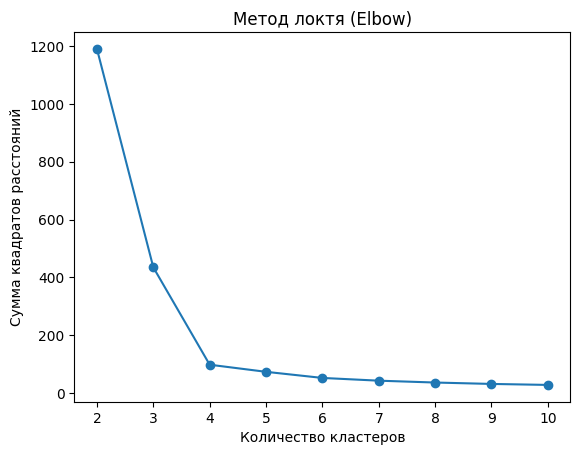

In [ ]:
# Создаём список для сохранения значений параметра "inertia" (сумма квадратов расстояний от точек до ближ. центроидов)
inertia_values = []

# Перебираем количество кластеров
for k in range(2, 11):
 # Создаём объект Kmeans с указанием количества кластеров - n_clusters и параметра "n_init = 10" для определения рандомного количества итераций перерасчёта центроид с разными сидами
 kmeans = KMeans(n_clusters = k, n_init = 10)
 # Производим кластеризацию
 kmeans.fit(data)
 # Сохраняем значение параметра "inertia" в список "inertia_values" - он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом
 inertia_values.append(kmeans.inertia_)

# Строим и выводим график зависимости суммы квадратов расстояний между центроидами кластеров и точек от количества кластеров
plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя (Elbow)")
plt.show()


Существенная разница в размере суммы квадратов расстояний между точками и центроидами кластеров исчезает после деления данных на 4 кластера. Таким образом, минимальным количеством кластеров для дальнейшей работы с данными будет **4 кластера**.

## Пункт 3: Кластеризация с параметрами по умолчанию

Метки кластеров:
[3 0 3 3 3 1 0 3 0 2 2 3 2 3 3 1 2 1 2 1 2 1 2 0 3 2 3 1 0 1 0 2 0 3 1 0 3
 0 0 0 1 0 3 2 3 2 3 1 1 0 2 1 1 2 1 0 1 2 2 0]
Координаты центроидов кластеров:
[[ 7.80108718  1.83601602]
 [12.63408028 12.05318737]
 [21.05644941 17.50206812]
 [ 2.5362683   5.97562846]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


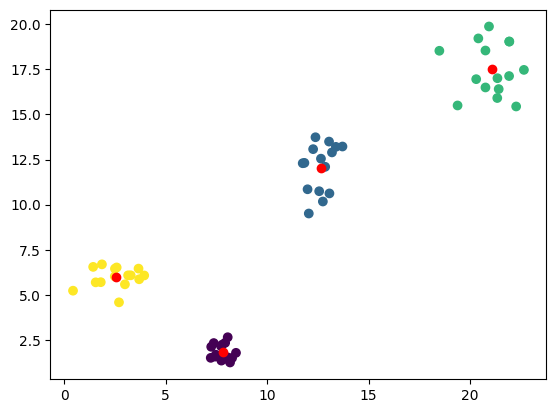

In [ ]:
# Создаём объект Kmeans, делим данные на 4 кластера
kmeans = KMeans(n_clusters = 4, n_init = 10)

# Производим кластеризацию данных
kmeans.fit(data)

# Записываем метки кластеров для каждого объекта
labels = kmeans.labels_

# Записываем координаты центроидов
centroids = kmeans.cluster_centers_

# Выводим необходимые данные
print("\033[31mМетки кластеров:\033[0m")
print(labels)
print("\033[31mКоординаты центроидов кластеров:\033[0m")
print(centroids)
labelNum = np.unique(labels)
for v in labelNum:
  print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек")
plt.scatter(data[:,0], data[:,1], c = labels )
plt.scatter(centroids[:,0], centroids[:,1], c = "r")
plt.show()


## Пункт 4: Кластеризация с заданными параметрами

random_state_parametr:  0
Метки кластеров:
[3 0 3 3 3 1 0 3 0 2 2 3 2 3 3 1 2 1 2 1 2 1 2 0 3 2 3 1 0 1 0 2 0 3 1 0 3
 0 0 0 1 0 3 2 3 2 3 1 1 0 2 1 1 2 1 0 1 2 2 0]
Координаты центроидов кластеров:
[[ 7.80108718  1.83601602]
 [12.63408028 12.05318737]
 [21.05644941 17.50206812]
 [ 2.5362683   5.97562846]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


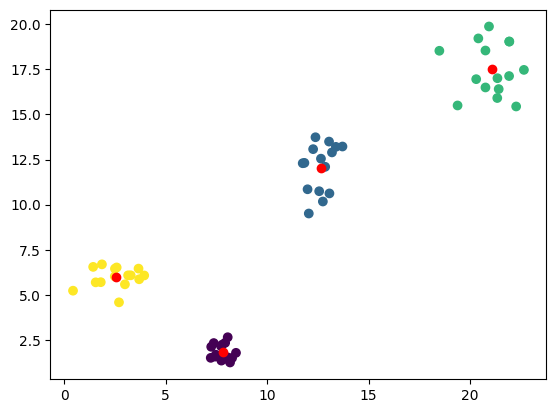

random_state_parametr:  1
Метки кластеров:
[3 1 3 3 3 2 1 3 1 0 0 3 0 3 3 2 0 2 0 2 0 2 0 1 3 0 3 2 1 2 1 0 1 3 2 1 3
 1 1 1 2 1 3 0 3 0 3 2 2 1 0 2 2 0 2 1 2 0 0 1]
Координаты центроидов кластеров:
[[21.05644941 17.50206812]
 [ 7.80108718  1.83601602]
 [12.63408028 12.05318737]
 [ 2.5362683   5.97562846]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


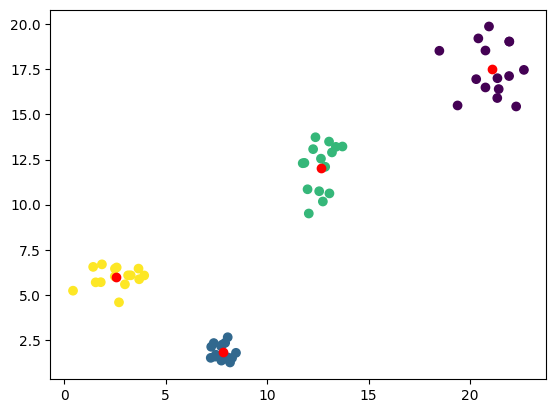

random_state_parametr:  2
Метки кластеров:
[0 3 0 0 0 2 3 0 3 1 1 0 1 0 0 2 1 2 1 2 1 2 1 3 0 1 0 2 3 2 3 1 3 0 2 3 0
 3 3 3 2 3 0 1 0 1 0 2 2 3 1 2 2 1 2 3 2 1 1 3]
Координаты центроидов кластеров:
[[ 2.5362683   5.97562846]
 [21.05644941 17.50206812]
 [12.63408028 12.05318737]
 [ 7.80108718  1.83601602]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


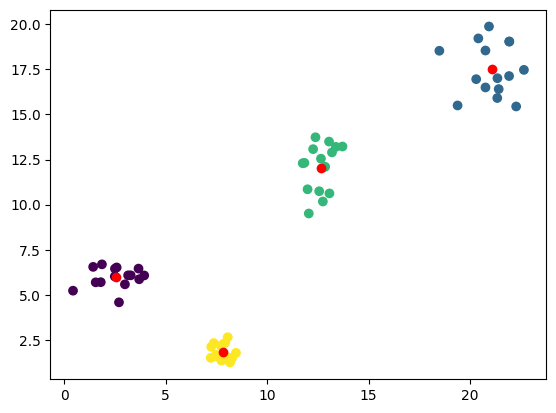

random_state_parametr:  3
Метки кластеров:
[0 3 0 0 0 1 3 0 3 2 2 0 2 0 0 1 2 1 2 1 2 1 2 3 0 2 0 1 3 1 3 2 3 0 1 3 0
 3 3 3 1 3 0 2 0 2 0 1 1 3 2 1 1 2 1 3 1 2 2 3]
Координаты центроидов кластеров:
[[ 2.5362683   5.97562846]
 [12.63408028 12.05318737]
 [21.05644941 17.50206812]
 [ 7.80108718  1.83601602]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


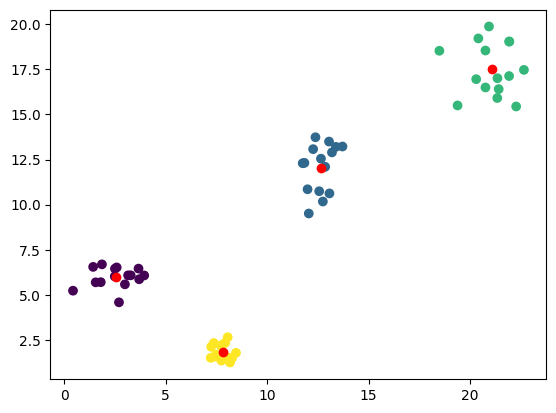

random_state_parametr:  4
Метки кластеров:
[3 1 3 3 3 2 1 3 1 0 0 3 0 3 3 2 0 2 0 2 0 2 0 1 3 0 3 2 1 2 1 0 1 3 2 1 3
 1 1 1 2 1 3 0 3 0 3 2 2 1 0 2 2 0 2 1 2 0 0 1]
Координаты центроидов кластеров:
[[21.05644941 17.50206812]
 [ 7.80108718  1.83601602]
 [12.63408028 12.05318737]
 [ 2.5362683   5.97562846]]
В кластере с меткой 0 содержится 15 точек
В кластере с меткой 1 содержится 15 точек
В кластере с меткой 2 содержится 15 точек
В кластере с меткой 3 содержится 15 точек


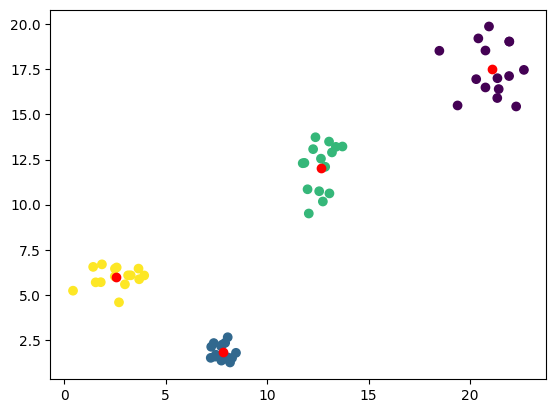

In [ ]:
# Циклическая кластеризация с увеличением параметра "random_state" на 1
for n in range (0,5):
  kmeans = KMeans( n_clusters = 4, random_state=n,  n_init = 10)

  # Производим кластеризацию данных
  kmeans.fit(data)

  # Записываем метки кластеров для каждого объекта
  labels = kmeans.labels_

  # Записываем координаты центроидов
  centroids = kmeans.cluster_centers_

  # Выводим необходимые данные
  print("\033[31mrandom_state_parametr: \033[0m", n )
  print("\033[31mМетки кластеров:\033[0m")
  print(labels)
  print("\033[31mКоординаты центроидов кластеров:\033[0m")
  print(centroids)
  labelNum = np.unique(labels)
  for v in labelNum:
    print(f"В кластере с меткой {v} содержится {np.sum(labels == v)} точек")
  plt.scatter(data[:,0], data[:,1], c = labels )
  plt.scatter(centroids[:,0], centroids[:,1], c = "r")
  plt.show()

По итогам проведения кластеризации данных в нескольких итерациях с различными показателями параметра **"n_init"**, отвечающего за количество перерасчёта центроид с разными сидами, и параметра **"random_state"**, отвечающего за случайность первичной генерации центроид, были получены идентичные результаты кластеризации данных, что, в свою очередь, может свидетельствовать о **достаточной точности и показательности** кластеризации данных именно таким образом, каким это получилось